https://medium.com/@Rehan_Sayyad/how-to-use-convolutional-neural-networks-for-time-series-classification-80575131a474

https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [1]:
import sys
import os
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('../..'))

sys.path.insert(1, module_path + '/src')
import audio_time_series_classification as preproject
import utility

sys.path.insert(1, module_path + '/src/models/')
import helper

from time import time

from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.utils.data_processing import from_nested_to_2d_array
import matplotlib.pyplot as plt
from sklearn import preprocessing
import keras.utils as np_utils
from sktime_dl.deeplearning import InceptionTimeClassifier

from sklearn.metrics import classification_report
import pickle

figure_path = module_path + '/figures/small_segment_dataset_plots/'

In [2]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_VAL.ts')


labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

start = time()
network = InceptionTimeClassifier(nb_epochs=20, verbose=True)
network.fit(X_train, y_train)
y_pred = network.predict(X_test)

print(f'Time utilized = {time() - start}')

['crackle' 'normal' 'wheeze'] [438 418 431]
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4000, 1)]    0                                            
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 4000, 1)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4000, 32)     1280        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 4000, 32)     640         input_1[0][0]                    
__________________________________________________

21/21 [==============================] - 207s 10s/step - loss: 1.2194 - accuracy: 0.3513
Epoch 2/20
21/21 [==============================] - 197s 9s/step - loss: 1.0632 - accuracy: 0.4601
Epoch 3/20
21/21 [==============================] - 253s 12s/step - loss: 1.0305 - accuracy: 0.4898
Epoch 4/20
21/21 [==============================] - 302s 14s/step - loss: 1.0318 - accuracy: 0.4742
Epoch 5/20
21/21 [==============================] - 303s 14s/step - loss: 1.0232 - accuracy: 0.4887
Epoch 6/20
21/21 [==============================] - 292s 14s/step - loss: 0.9969 - accuracy: 0.4992
Epoch 7/20
21/21 [==============================] - 282s 13s/step - loss: 0.9219 - accuracy: 0.5652
Epoch 8/20
21/21 [==============================] - 282s 13s/step - loss: 0.8969 - accuracy: 0.5833
Epoch 9/20
21/21 [==============================] - 307s 15s/step - loss: 0.8993 - accuracy: 0.5710
Epoch 10/20
21/21 [==============================] - 311s 15s/step - loss: 0.8537 - accuracy: 0.6197
Epoch 11/20

              precision    recall  f1-score   support

     crackle       0.67      0.07      0.13       111
      normal       0.00      0.00      0.00       105
      wheeze       0.39      1.00      0.56       128

    accuracy                           0.40       344
   macro avg       0.35      0.36      0.23       344
weighted avg       0.36      0.40      0.25       344



/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


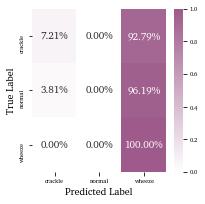

In [6]:
y_pred_3class = y_pred

figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, hex_color_str = '#9d5a8a')

f.savefig(figure_path + f'cm_inceptionTime_3class.pdf', bbox_inches='tight')

print(classification_report(y_test, y_pred))

# 2 class

In [7]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_VAL.ts')


labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

start = time()
network = InceptionTimeClassifier(nb_epochs=20, verbose=True)
network.fit(X_train, y_train)
y_pred = network.predict(X_test)

print(f'Time utilized = {time() - start}')

['crackle' 'wheeze'] [426 441]
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 4000, 1)]    0                                            
__________________________________________________________________________________________________
max_pooling1d_6 (MaxPooling1D)  (None, 4000, 1)      0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_31 (Conv1D)              (None, 4000, 32)     1280        input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_32 (Conv1D)              (None, 4000, 32)     640         input_2[0][0]                    
_____________________________________________________________

14/14 [==============================] - 126s 9s/step - loss: 0.7683 - accuracy: 0.5854
Epoch 2/20
14/14 [==============================] - 119s 8s/step - loss: 0.6347 - accuracy: 0.6575
Epoch 3/20
14/14 [==============================] - 119s 8s/step - loss: 0.6145 - accuracy: 0.6384
Epoch 4/20
14/14 [==============================] - 116s 8s/step - loss: 0.5725 - accuracy: 0.6853
Epoch 5/20
14/14 [==============================] - 120s 9s/step - loss: 0.5568 - accuracy: 0.7098
Epoch 6/20
14/14 [==============================] - 123s 9s/step - loss: 0.5755 - accuracy: 0.7083
Epoch 7/20
14/14 [==============================] - 136s 10s/step - loss: 0.5262 - accuracy: 0.7396
Epoch 8/20
14/14 [==============================] - 138s 10s/step - loss: 0.4432 - accuracy: 0.7827
Epoch 9/20
14/14 [==============================] - 138s 10s/step - loss: 0.4108 - accuracy: 0.8125
Epoch 10/20
14/14 [==============================] - 141s 10s/step - loss: 0.3671 - accuracy: 0.8618
Epoch 11/20
14/1

              precision    recall  f1-score   support

     crackle       0.52      1.00      0.69       123
      wheeze       1.00      0.01      0.02       114

    accuracy                           0.52       237
   macro avg       0.76      0.50      0.35       237
weighted avg       0.75      0.52      0.36       237



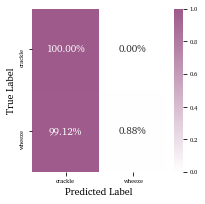

In [8]:
y_pred_2class = y_pred

figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, hex_color_str = '#9d5a8a')

f.savefig(figure_path + f'cm_inceptionTime_2class.pdf', bbox_inches='tight')


print(classification_report(y_test, y_pred))